Как были получены графики из этого видео, можно посмотреть в ноутбуке nonstationary_time_series.ipynb, скачав также все датасеты к нему.

Прежде чем перейти к методам анализа и предсказания временных рядов, нам нужно познакомиться с понятиями стационарности и нестационарности.

Идея стационарности временного ряда в том, что его свойства не зависят от конкретного момента времени. В каком смысле не зависят?

ПРИМЕР 1

Давайте посмотрим на картинку. На ней представлена разница цен акций компании Uniqlo в момент открытия и закрытия биржи за 550 дней.

Этот ряд стационарен, свойства ряда не зависят от времени.

Мы можем взять любой интервал размером 100 дней или, как говорят в эконометрике, окно и поместить его в любое место графика. Поведение временного ряда не будет принципиально меняться, то есть не будет зависеть от того, в какой момент времени мы поставили наше окно.

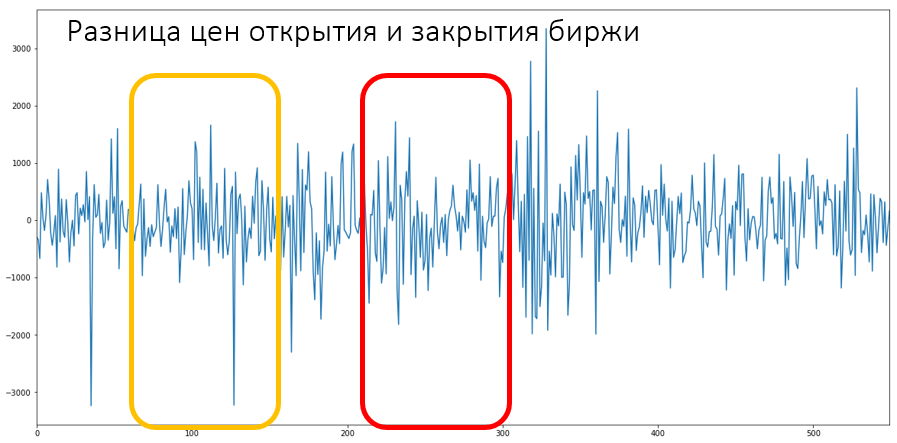

ПРИМЕР 2

Давайте теперь посмотрим отдельно на динамику цен открытия биржи.

На участке в зелёном окне она сначала растёт, а затем падает. А в оранжевом всё время падает.

В красном окне видим третий вариант поведения ряда.

Это пример нестационарного ряда.

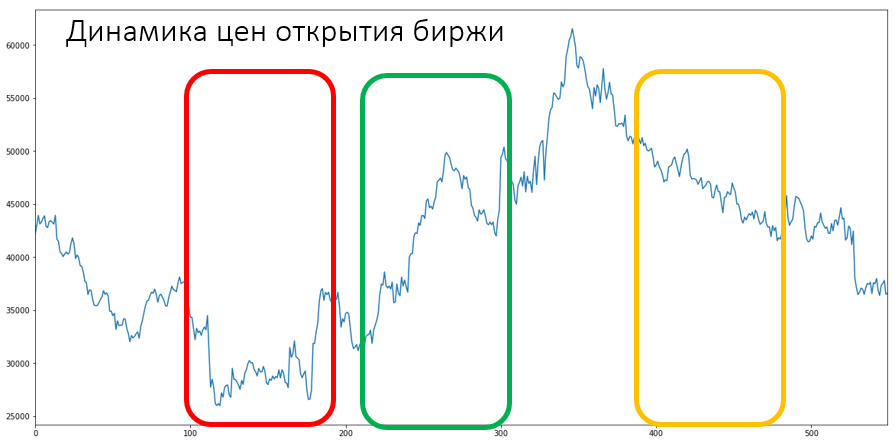

Примерами нестационарных рядов являются ряды с трендом и сезонностью. В этом случае у ряда будет непостоянное среднее.

Также возможен вариант, когда «гуляет» дисперсия: на каких-то участках разброс значений маленький, а на каких-то большой.

ПРИМЕР «ТРЕНД + СЕЗОННОСТЬ»

На графике ниже представлено ежемесячное производство конфет в USA c января 1979 по август 2017 г.

У ряда на картинке имеется тренд и ярко выраженные сезонные колебания.

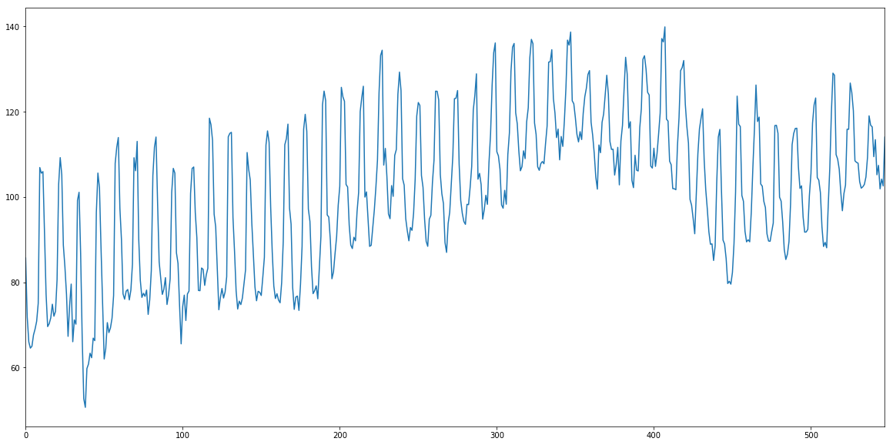

Давайте посмотрим на него поближе. Здесь 48 месяцев, т. е. 4 года. Явно видно, что каждый год в ноябре-декабре наблюдается сильный пик, вероятно, связанный с рождественскими праздниками.

Период сезонности будет составлять 12 месяцев.

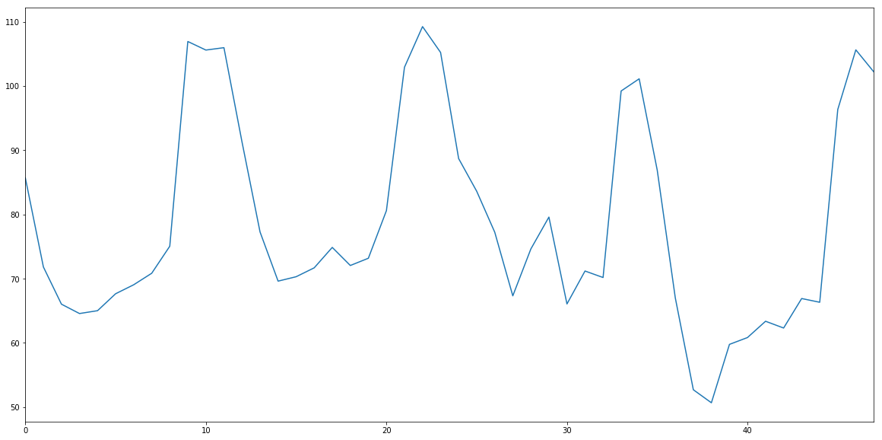

ПРИМЕР «СЕЗОННОСТЬ + НЕСТАЦИОНАРНАЯ ДИСПЕРСИЯ»

На графике ниже представлено ежедневное производство энергии с помощью солнечных батарей в одном доме за 800 дней.

Здесь можно увидеть ярко выраженную сезонность, связанную с различной мощностью солнечных батарей в разное время года. Кроме того, хорошо заметна нестационарность дисперсии: в сезоны большего производства энергии разброс данных значительно сильнее.

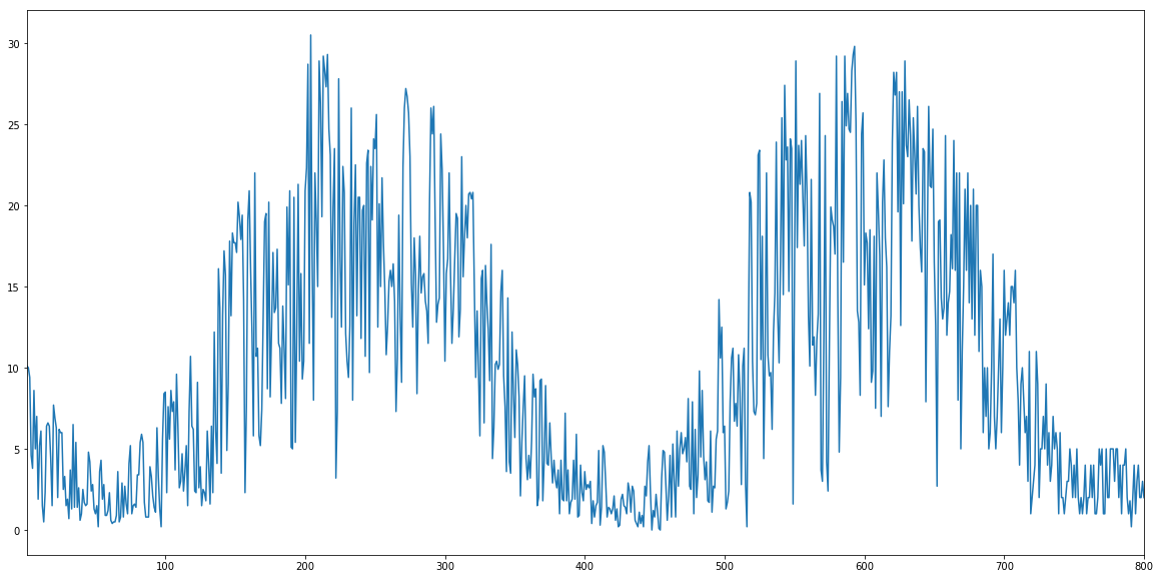

Посмотрим на тот же временной ряд в более узком окне.

Здесь хорошо видно, что сезонная периодичность составляет около 1 года.

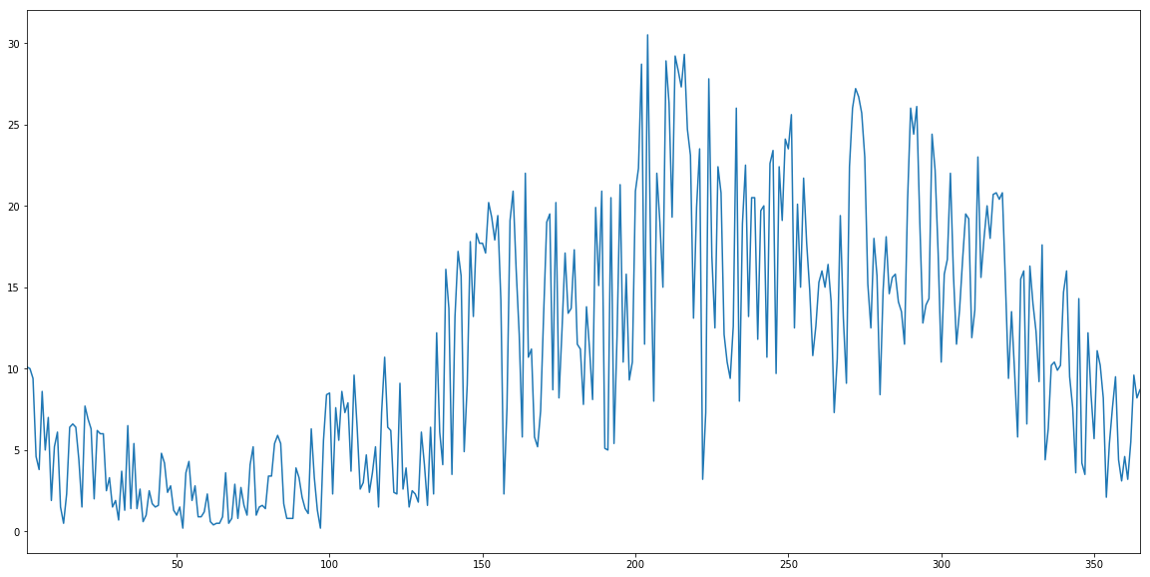

В ЧЁМ ПРОБЛЕМА?

Какие проблемы сулит нам нестационарность?

Например, на графике справа мы видим колебания курса доллара к биткоину на бирже криптовалют. Можно заметить явный тренд на убывание. Легко может оказаться, что вы обучите регрессию, оцените, и все статистические тесты скажут вам, что она значима и внутри сэмпла она будет хорошо прогнозировать и обещать вам супер-стратегию на много денег.

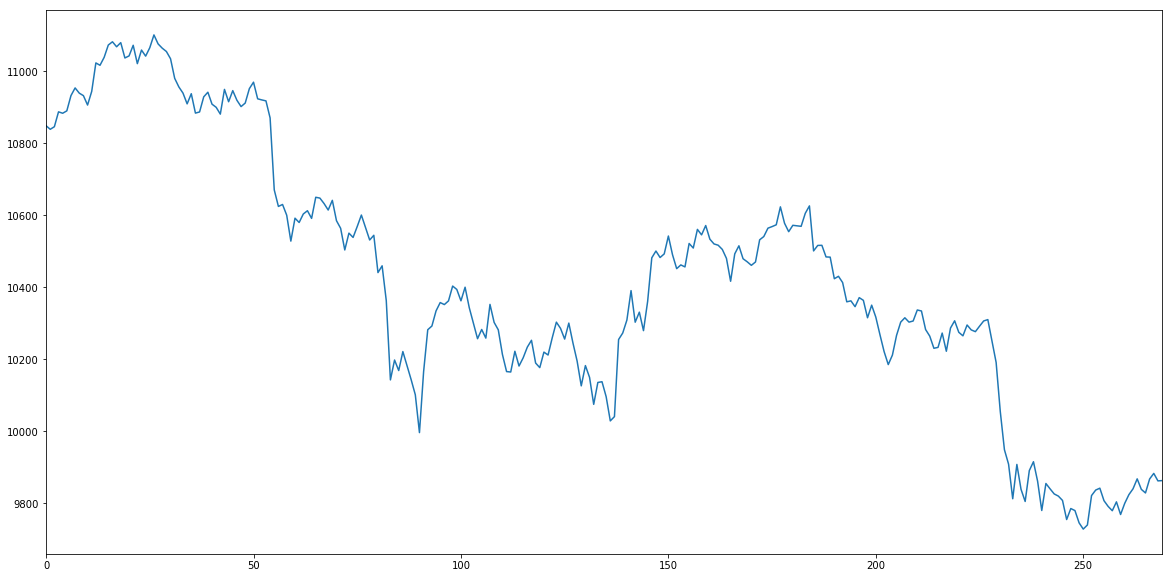

Однако дальше вас ждёт сюрприз, потому что ничего не предвещало (а особенно ваша модель), но ряд внезапно и надолго пошел вверх. И вся ваша прекрасная стратегия умножилась на ноль, потому что она больше ничего не угадывает.

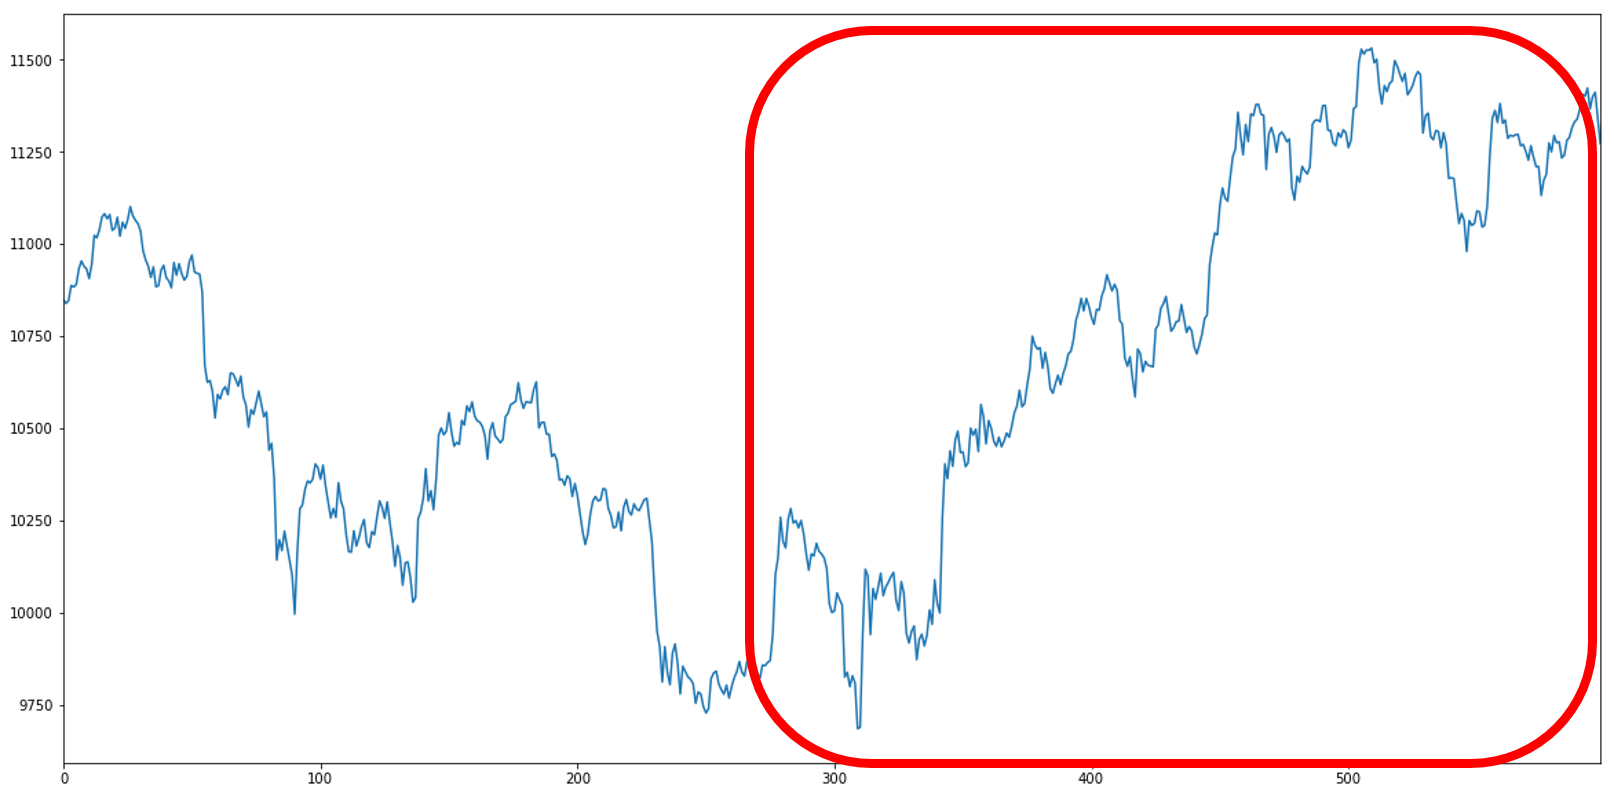

SPURIOUS REGRESSION

Самый большой страх при анализе временных рядов — найти закономерность, которой на самом деле нет, то есть принять случайное за закономерное. Это называется ложная регрессия (англ. spurious regression).

ПРИМЕР: «ПРОГНОЗ» СЛУЧАЙНОГО БЛУЖДАНИЯ

Ярким примером ложной регрессии является попытка прогнозировать случайные блуждания.

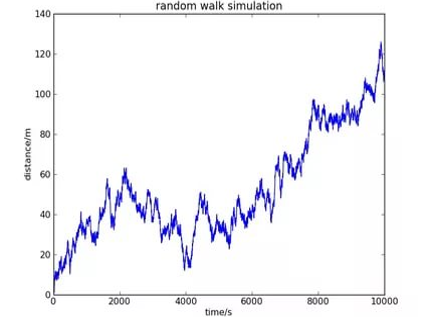

Можно найти тренд от времени, значимую корреляцию и так далее, но эта закономерность абсолютно бессмысленна, и дальше ряд не будет ей следовать.

Означает ли это, что прогнозировать нестационарные ряды бессмысленно? Конечно же, нет, но нужно делать это крайне аккуратно. Например, не гнать просто так линейную регрессию одной криптовалюты на другую.

Пример spurious regression на двух случайных блужданиях (на английском языке): https://www.learneconometrics.com/class/5263/notes/Spurious%20Regressions.pdf

КАК ИЗБЕЖАТЬ ПРОБЛЕМ?

Существуют два инструмента:

- Проверка ряда на стационарность с выбором подходящей модели в зависимости от её результата.
- Обязательная проверка готовой обученной модели out of sample (за пределами обучающей выборки).

ПРОВЕРКА НА СТАЦИОНАРНОСТЬ 

- Первое, что мы делаем, это рисуем график временного ряда и ищем нестационарность на глаз. Часто можно явно увидеть тренд и сезонность, особенно если знать что-то о природе данных. Например, экономические данные (продажи, клики, производство чего-нибудь) почти всегда периодичны.

- Второй вариант проверки — это статистические тесты. Самый популярный и реализованный в Python — тест Дикки-Фуллера.

По умолчанию считаем ряд нестационарным. Наши данные могут противоречить этой гипотезе или не противоречить.

Мерой доверия к гипотезе по умолчанию («нулевой гипотезе») является величина p-value. Если упростить: p-value показывает, насколько правдоподобна нулевая гипотеза при имеющихся данных. Чем p-value меньше, тем меньше мы верим в нестационарность, и тем больше у нас оснований отвергнуть нулевую гипотезу и считать ряд стационарным.

P-value будет считать за нас Python.

Классическая договоренность:

- p-value < 0.01 — точно отвергаем нулевую гипотезу;
- p-value: 0.01 - 0.05 — отвергаем и считаем ряд стационарным, но уже не так уверены;
- p-value: 0.05 - 0.1 — пограничный случай, слабое свидетельство стационарности;
- p-value > 0.1 — не отвергаем, продолжаем считать ряд нестационарным.

ПРОВЕРКА МОДЕЛИ OUT OF SAMPLE

Как выполняется проверка out of sample:

- В классической регрессии: случайно делим выборку на train-test, обучаем на train, тестируем на test.
- В анализе временных рядов нельзя делить выборку случайно, так как нам важна последовательность измерений, поэтому мы делим весь ряд на последовательные куски. Например, обучаем на train (первой 1000 измерений), тестируем на test (следующих двух сотнях).